<center><h1>Assignment 2a</h1></center>




- **Name: Himanshu Pandey**
- **Roll No: 2018IMT-038**
- **Course: Machine Learning Lab**
- **Course Code: ITIT-4107**
- **Deadline: 25 September 2021**

Importing necessary library for completing the classification. Libraries used are NumPy, scikitlearn, matplotlib, Pandas

In [35]:
import numpy as np
from time import time
import pandas as pd
import os
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from itertools import chain
from sklearn.metrics import confusion_matrix

Converting the MNIST dataset original lecun files to CSV

In [4]:
def convert(imgf, labelf, outf, n):
    f = open(imgf, "rb")
    o = open(outf, "w")
    l = open(labelf, "rb")

    f.read(16)
    l.read(8)
    images = []

    for i in range(n):
        image = [ord(l.read(1))]
        for j in range(28*28):
            image.append(ord(f.read(1)))
        images.append(image)

    for image in images:
        o.write(",".join(str(pix) for pix in image)+"\n")
    f.close()
    o.close()
    l.close()

convert("train-images.idx3-ubyte", "train-labels.idx1-ubyte",
"mnist_train.csv", 60000)
convert("t10k-images.idx3-ubyte", "t10k-labels.idx1-ubyte",
"mnist_test.csv", 10000)

In [36]:
df_train = pd.read_csv('mnist_train.csv')
df_test = pd.read_csv('mnist_test.csv')

Renaming our label columns in train and test data set

In [37]:
df_train.rename(columns={'5':'label'}, inplace=True)
df_test.rename(columns={'7':'label'}, inplace=True)

Saving our altered datasets to original csv files

In [38]:
df_train.to_csv('mnist_train_final.csv', index=False)
df_test.to_csv('mnist_test_final.csv', index=False)

Reading our MNIST dataset from new CSV files


In [39]:
df_train = pd.read_csv('mnist_train_final.csv')
df_test = pd.read_csv('mnist_test_final.csv')

Generating first 5 rows of our test and train set to get the intuition of dataset

In [40]:
df_train.head()

,label,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df_test.head()

,label,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Extracting labels and storing it to 'labels_train'

In [18]:
labels_train = df_train['label'].to_numpy()


Extracting our training digits

In [19]:
df_digits = df_train.drop('label',axis=1)


Representing our digit image from the df_train index=3 i.e. digit 9

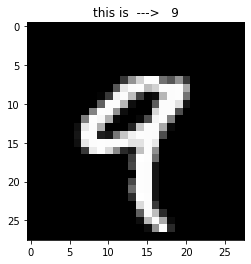

In [43]:
index = 3
digits_data_train = df_digits.to_numpy()
digit = digits_data_train[index]

#flattening the matrix

digit = digit.reshape(28,28)
plt.title('this is  --->   ' + str(labels_train[index]))
plt.imshow(digit, cmap='gray')

# Train Test Data Split

In [44]:
X_train=df_digits
y_train=df_train['label']

In [45]:
df_digits_test=df_test.drop('label',axis=1)

In [46]:
X_test=df_digits_test
y_test=df_test['label']

# Naive Bayes Classifier from Scratch

In [47]:
class NB():
    def prior(self, features, target):
        self.prior = (features.groupby(target).apply(lambda x: len(x)) / self.rows).to_numpy()
        return self.prior
    
    def parameters(self, features, target):
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()
        return self.mean, self.var
    
    def gaussians(self, class_idx, x):     
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        prob = numerator / denominator
        return prob
    
    def calc_posterior(self, x):
        posteriors = []
        for i in range(self.count):
            prior = np.log(self.prior[i])
            conditional = np.sum(np.log(self.gaussians(i, x)))
            posterior = prior + conditional
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]
     
    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]   
        self.parameters(features, target)
        self.prior(features, target)
        
    def predict(self, features):
        preds = [self.calc_posterior(f) for f in features.to_numpy()]
        return preds

    def accuracy(self, y_test, y_pred):
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy

Training our NB classifier on sample train data

In [48]:
nb_model = NB()
nb_model.fit(X_train, y_train)

Making predicitions on test data

In [49]:
predictions = nb_model.predict(X_test)


<ipython-input-47-39518209fc99>:14: RuntimeWarning: divide by zero encountered in true_divide
  numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
<ipython-input-47-39518209fc99>:14: RuntimeWarning: invalid value encountered in true_divide
  numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
<ipython-input-47-39518209fc99>:16: RuntimeWarning: invalid value encountered in true_divide
  prob = numerator / denominator
<ipython-input-47-39518209fc99>:23: RuntimeWarning: divide by zero encountered in log
  conditional = np.sum(np.log(self.gaussians(i, x)))


# Error Analysis and Report

In [50]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, predictions))


Classification Report

              precision    recall  f1-score   support

           0       0.10      1.00      0.18       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1027
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.10      9999
   macro avg       0.01      0.10      0.02      9999
weighted avg       0.01      0.10      0.02      9999



/home/udit/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
